In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
wind_df = pd.read_csv('../data/UNdata_Export_Wind_data.csv')
print(wind_df.shape)
print(wind_df.columns)
wind_df = wind_df.drop(columns='Quantity Footnotes')
wind_df = wind_df.dropna()
print(wind_df.shape)
print(wind_df.head(10))
print(wind_df.tail(10))

(2240, 6)
Index(['Country or Area', 'Commodity - Transaction', 'Year', 'Unit',
       'Quantity', 'Quantity Footnotes'],
      dtype='object')
(2238, 5)
  Country or Area              Commodity - Transaction    Year  \
0         Algeria  Electricity - total wind production  2020.0   
1         Algeria  Electricity - total wind production  2019.0   
2         Algeria  Electricity - total wind production  2018.0   
3         Algeria  Electricity - total wind production  2017.0   
4         Algeria  Electricity - total wind production  2016.0   
5         Algeria  Electricity - total wind production  2015.0   
6         Algeria  Electricity - total wind production  2014.0   
7       Argentina  Electricity - total wind production  2021.0   
8       Argentina  Electricity - total wind production  2020.0   
9       Argentina  Electricity - total wind production  2019.0   

                      Unit   Quantity  
0  Kilowatt-hours, million      7.701  
1  Kilowatt-hours, million     11.690  


In [4]:
print(wind_df[wind_df['Unit']=='Kilowatt-hours, million'].count())
print("\n")
print(wind_df[wind_df['Commodity - Transaction']=='Electricity - total wind production'].count())
print("\n")
wind_df = (wind_df
    .drop(columns = ['Commodity - Transaction', 'Unit'])
    .rename(columns = {'Quantity':'Total_Wind_GWh', 'Country or Area':'Country'})
    )
print(wind_df.head(10))
print(wind_df.tail(10))

Country or Area            2238
Commodity - Transaction    2238
Year                       2238
Unit                       2238
Quantity                   2238
dtype: int64


Country or Area            2238
Commodity - Transaction    2238
Year                       2238
Unit                       2238
Quantity                   2238
dtype: int64


     Country    Year  Total_Wind_GWh
0    Algeria  2020.0           7.701
1    Algeria  2019.0          11.690
2    Algeria  2018.0          10.520
3    Algeria  2017.0          19.400
4    Algeria  2016.0          19.400
5    Algeria  2015.0          19.240
6    Algeria  2014.0           1.000
7  Argentina  2021.0       12938.000
8  Argentina  2020.0        9412.333
9  Argentina  2019.0        4996.000
       Country    Year  Total_Wind_GWh
2228  Viet Nam  2017.0           270.0
2229  Viet Nam  2016.0           221.0
2230  Viet Nam  2015.0           261.0
2231  Viet Nam  2014.0           300.0
2232  Viet Nam  2013.0            92.0
2233  Vie

In [5]:
wind_pivoted = wind_df.pivot_table(values = 'Total_Wind_GWh',index='Country', columns ='Year')
print(wind_pivoted.shape)

wind_pivoted_1990_2018 = (wind_pivoted
                          #similar to gdp data - dropped rows with nan in 1990 and 2018
                          .dropna(subset=[1990, 2018])
                          #dropped 2021 since all rows are nan for remainining rows
                          .drop(columns=[2021])
                         )
print(wind_pivoted_1990_2018.shape)

(137, 32)
(13, 31)


Interesting to note that only 13 countries have wind data from 1990 to 2018, unlike the 206 that GDP for the same timeframe and the 137 total countries that have wind data at all - wind power is definitely a more recent development for many countries!

In [6]:
wind_pivoted_1990_2018['Wind_Percent_Change'] = 100*(wind_pivoted_1990_2018[2018]-wind_pivoted_1990_2018[1990])/wind_pivoted_1990_2018[1990]

#note - Japan has "0.0" GWh of wind production in 1990 - for the purpose of calculating % change, Japan is being dropped
wind_pivoted_1990_2018 = wind_pivoted_1990_2018.drop(index=['Japan'])
wind_pivoted_1990_2018 = wind_pivoted_1990_2018.sort_values('Wind_Percent_Change',ascending=False)
wind_pivoted_1990_2018

Year,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,Wind_Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Mexico,1.0,1.0,1.0,1.0,5.0,7.0,6.0,12.0,15.0,17.0,...,3688.0,4185.0,6426.0,8745.0,10378.0,10441.830,12877.000,16880.000,19702.000,1.287600e+06
Portugal,1.0,1.0,4.0,11.0,17.0,16.0,21.0,38.0,89.0,123.0,...,10259.0,12014.0,12111.0,11608.0,12474.0,12247.853,12616.584,13666.949,12298.663,1.261558e+06
Italy,2.0,3.0,2.0,4.0,7.0,9.0,33.0,118.0,231.0,403.0,...,13407.0,14897.0,15178.0,14844.0,17689.0,17741.909,17716.434,20202.041,18761.557,8.857217e+05
United Kingdom,9.0,11.0,40.0,218.0,342.0,391.0,488.0,667.0,877.0,850.0,...,19847.0,28397.0,31959.0,40275.0,37159.0,49641.122,56907.615,63795.166,75369.123,6.322068e+05
Spain,14.0,15.0,103.0,116.0,175.0,270.0,364.0,742.0,1352.0,2744.0,...,49472.0,55646.0,52013.0,49325.0,48905.0,49127.000,50896.000,55647.000,56444.000,3.634429e+05
Greece,2.0,2.0,8.0,47.0,37.0,34.0,38.0,36.0,70.0,162.0,...,3850.0,4139.0,3689.0,4621.0,5146.0,5536.987,6300.259,7266.347,9310.104,3.149130e+05
Sweden,6.0,13.0,31.0,48.0,72.0,99.0,144.0,203.0,317.0,358.0,...,7164.0,9842.0,11235.0,16322.0,15479.0,17609.000,16623.000,19847.000,27526.000,2.769500e+05
India,32.0,39.0,52.0,57.0,182.0,498.0,926.0,1037.0,1127.0,1509.0,...,28365.0,33583.0,27057.0,30045.0,35530.0,38486.000,64294.000,69949.000,67418.000,2.008188e+05
Belgium,7.0,8.0,9.0,8.0,9.0,9.0,8.0,8.0,11.0,13.0,...,2751.0,3665.0,4615.0,5574.0,5417.0,6518.300,7571.400,9750.200,12763.600,1.080629e+05


In [7]:
wind_pivoted = wind_pivoted.sort_values(2020,ascending=False)
wind_pivoted.head(10)

Year,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Country,,,,,,,,,,,,,,,,,,,,,
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95978.0,141197.0,159979.0,185766.0,237070.0,297230.000,365971.000,406030.000,466470.000,NaN
United States,3066.0,3051.0,2917.0,3053.0,3483.0,3196.0,3410.0,3254.0,3018.0,4802.0,...,141922.0,169713.0,183892.0,192992.0,229471.0,257249.072,275834.468,298200.120,341818.283,NaN
Germany,NaN,215.0,291.0,674.0,1428.0,1712.0,2078.0,3034.0,4593.0,5528.0,...,51680.0,52737.0,58497.0,80624.0,79924.0,105693.000,109951.000,125894.000,132102.000,NaN
United Kingdom,9.0,11.0,40.0,218.0,342.0,391.0,488.0,667.0,877.0,850.0,...,19847.0,28397.0,31959.0,40275.0,37159.0,49641.122,56907.615,63795.166,75369.123,NaN
India,32.0,39.0,52.0,57.0,182.0,498.0,926.0,1037.0,1127.0,1509.0,...,28365.0,33583.0,27057.0,30045.0,35530.0,38486.000,64294.000,69949.000,67418.000,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5050.0,6579.0,12211.0,21626.0,33488.0,42373.000,48475.000,55986.000,57050.000,NaN
Spain,14.0,15.0,103.0,116.0,175.0,270.0,364.0,742.0,1352.0,2744.0,...,49472.0,55646.0,52013.0,49325.0,48905.0,49127.000,50896.000,55647.000,56444.000,NaN
France,NaN,NaN,NaN,2.0,5.0,5.0,7.0,11.0,19.0,37.0,...,15178.0,16127.0,17324.0,21420.0,21381.0,24609.437,28598.595,34787.353,39791.901,NaN
Canada,NaN,NaN,59.0,59.0,59.0,59.0,62.0,62.0,62.0,164.0,...,11310.0,18092.0,22538.0,26964.0,30930.0,31511.000,33142.000,32748.000,35638.000,NaN


In [8]:
wind_pivoted.loc['China',1999:2011]
wind_df['Year']

0       2020.0
1       2019.0
2       2018.0
3       2017.0
4       2016.0
         ...  
2233    2012.0
2234    2011.0
2235    2010.0
2236    2009.0
2237    2008.0
Name: Year, Length: 2238, dtype: float64

Notice that countries with the top total wind electricity production in 2020 weren't necessarily reporting their wind production data to the UN in the 90s - China had the top wind electricity production in 2020 and a high wind electricity production in every year they reported wind production data, but they didn't start reporting until 2009. % Change from 1990 to 2018 likely isn't a good metric for many countries since the data is incomplete.

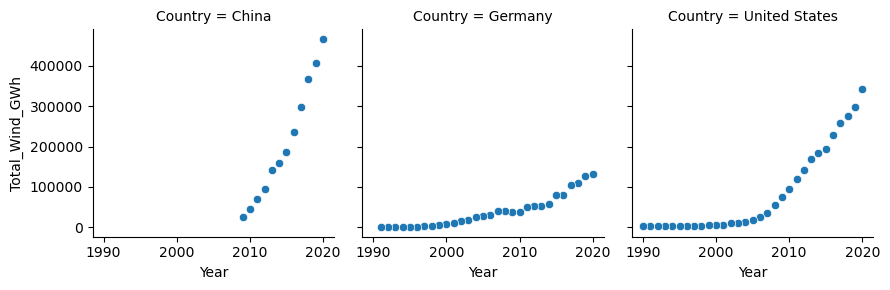

In [9]:
facetload = sns.FacetGrid(data=wind_df[(wind_df['Country'] == 'China') | (wind_df['Country'] == 'United States') | (wind_df['Country'] == 'Germany')], col = 'Country')
facetload.map(sns.scatterplot, 'Year','Total_Wind_GWh')

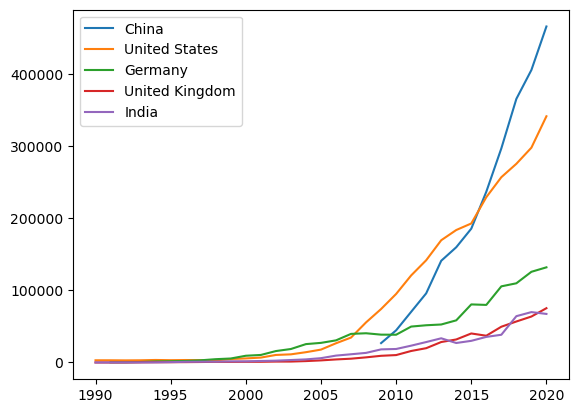

In [10]:
plt.plot(wind_pivoted.loc['China'])
plt.plot(wind_pivoted.loc['United States'])
plt.plot(wind_pivoted.loc['Germany'])
plt.plot(wind_pivoted.loc['United Kingdom'])
plt.plot(wind_pivoted.loc['India'])
plt.legend(['China','United States','Germany','United Kingdom','India'])

In [11]:
#Import UN GDP Data and re-organize like guided excercise
gdp_df = pd.read_csv('../data/UNdata_Export_20230915_035336592.csv')
gdp_df = gdp_df.drop(columns='Value Footnotes')
gdp_df = gdp_df.rename(columns={'Country or Area':'Country', 'Value':'GDP_Per_Capita'})

#Import UN Continents data and merge like guided exercise
continents = pd.read_csv('../data/continents.csv')
gdp_df=continents.merge(gdp_df,how='inner')

#Import UN Life Expectancy Data and re-organize like guided exercise
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_5839536.csv',skiprows=[0,2])
life_expectancy=(life_expectancy
                 .drop(columns=["Country Code","Indicator Name", "Indicator Code"])
                 .melt(id_vars="Country Name",var_name='Year', value_name='Life_Expectancy')
                 .rename(columns = {"Country Name":"Country"})
                )

#Merge Life Expectancy and GDP dataframes like in guided exercise
life_expectancy=life_expectancy[life_expectancy['Year'] != 'Unnamed: 67']
life_expectancy['Year']=life_expectancy['Year'].astype(np.int64)
gdp_le = life_expectancy.merge(gdp_df,how='inner',on=["Country","Year"])
print(gdp_le.head())

                Country  Year  Life_Expectancy      Continent  GDP_Per_Capita
0                 Aruba  1990           73.076  North America    32589.018572
1                Angola  1990           41.893         Africa     5758.950488
2               Albania  1990           73.144         Europe     4827.034551
3  United Arab Emirates  1990           71.900           Asia   111454.055665
4             Argentina  1990           71.784  South America    14144.763670


In [12]:
full_wind_df = gdp_le.merge(wind_df,how='inner',on=["Country","Year"])
print(full_wind_df.head())

          Country  Year  Life_Expectancy Continent  GDP_Per_Capita  \
0         Belgium  1990        76.051951    Europe    35506.926515   
1         Denmark  1990        74.805366    Europe    39027.978737   
2           Spain  1990        76.837561    Europe    27543.919244   
3  United Kingdom  1990        75.880488    Europe    31217.218062   
4          Greece  1990        76.939024    Europe    24262.947667   

   Total_Wind_GWh  
0             7.0  
1           610.0  
2            14.0  
3             9.0  
4             2.0  


In [13]:
full_wind_df_2020 = full_wind_df[full_wind_df['Year']==2020].sort_values('Total_Wind_GWh',ascending=False)
full_wind_df_2020.tail(10)

,Country,Year,Life_Expectancy,Continent,GDP_Per_Capita,Total_Wind_GWh
1641,Armenia,2020,72.17300,Europe,12619.892154,1.869
1671,Fiji,2020,67.92400,Oceania,11526.962287,1.136
1652,Bhutan,2020,71.60900,Asia,10551.451850,1.110
1648,Bahrain,2020,79.17400,Asia,41545.841499,1.000
1662,Dominica,2020,73.64900,North America,10256.330820,0.600
1697,Madagascar,2020,65.18200,Africa,1463.787723,0.465
1677,Guyana,2020,68.48600,South America,18679.955429,0.350
1739,Samoa,2020,72.76800,Oceania,6413.330111,0.218
1732,Trinidad and Tobago,2020,74.40600,North America,24768.681553,0.059
1701,Malta,2020,82.34878,Europe,40696.738374,0.058


<Axes: xlabel='Total_Wind_GWh', ylabel='Continent'>

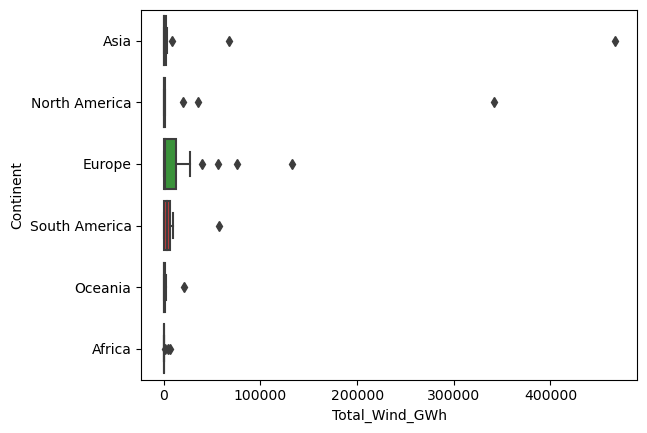

In [14]:
sns.boxplot(data=full_wind_df_2020,x='Total_Wind_GWh',y='Continent')

The United States and China are clear outliers. I need to extract them for any of my graphs to have any chance at being useful.

<Axes: xlabel='Total_Wind_GWh', ylabel='Continent'>

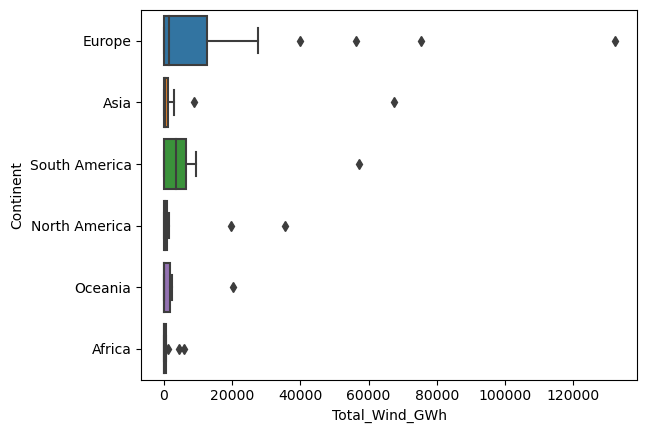

In [15]:
full_wind_df_no_outliers_2020 = full_wind_df_2020[(full_wind_df_2020['Country']!= 'China') & (full_wind_df_2020['Country']!='United States')]
sns.boxplot(data=full_wind_df_no_outliers_2020,x='Total_Wind_GWh',y='Continent')

This is still a very rough boxplot showing that, even without the United States and China, only a very small handful of countries have significant wind electricity production. Europe, overall, is leading wind electricity production in 2020, but it is really only less than 10 countries throughout the world that are very clearly dedicated to wind electricity production

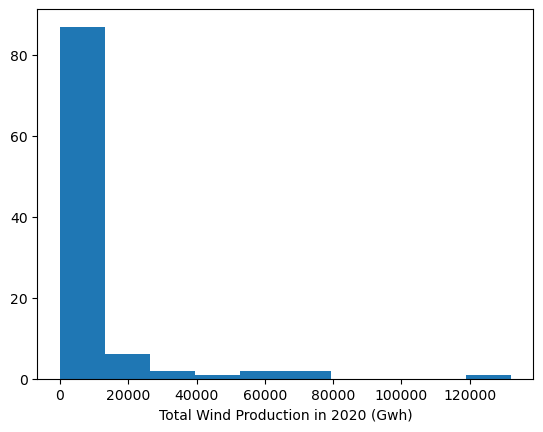

In [16]:
plt.hist(full_wind_df_no_outliers_2020['Total_Wind_GWh'])
plt.xlabel('Total Wind Production in 2020 (Gwh)')
plt.show()

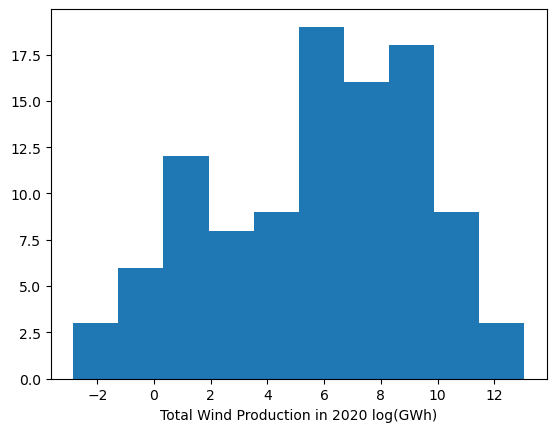

In [17]:
#Let's try a log transformation to see if it normalizes the wind electricity production data
full_wind_df_2020['log_wind']= np.log(full_wind_df_2020['Total_Wind_GWh'])
plt.hist(full_wind_df_2020['log_wind'])
plt.xlabel('Total Wind Production in 2020 log(GWh)')
plt.show()

I didn't even need to take The United States and China out! This histogram appears to have a much more normal distriubtion with the log transformation of wind electricity production data. The cell below tests normality with scipy, and shows that this distribution can be assumed to be normal.

In [18]:
islogwindnormal = st.normaltest(full_wind_df_2020['log_wind'])
log_wind_normal_pvalue=islogwindnormal[1]

if log_wind_normal_pvalue>=0.05:
    print('The p value was {:.3f}. The null hypothesis of the normality test was not rejected. The log_wind distribution can be assumed to be normal.'.format(log_wind_normal_pvalue))
else:
    print('The p value was {:.3f}. The null hypothesis of the normality test was rejected. Log_wind cannot be assumed to be normal.'.format(log_wind_normal_pvalue))

The p value was 0.125. The null hypothesis of the normality test was not rejected. The log_wind distribution can be assumed to be normal.


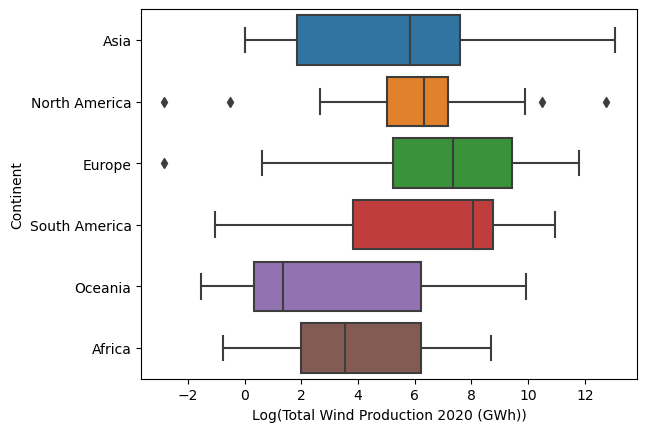

In [19]:
sns.boxplot(data=full_wind_df_2020,x='log_wind',y='Continent').set(xlabel='Log(Total Wind Production 2020 (GWh))')
plt.show()

The log transformation really cleans up the boxplot comparing the wind production by continent as well. It appears that, by continent, wind prodcution by country is pretty comparable. I wouldn't expect an ANOVA comparison to show that there is a significant difference between continents.

In [132]:
continents = []
for continent in full_wind_df_2020['Continent'].unique():
    continents.append([continent,full_wind_df_2020[full_wind_df_2020['Continent'] == continent]['log_wind'].values])
continents_df = pd.DataFrame(continents)

continent_anova=st.f_oneway(*continents_df[1])
print(continent_anova)

F_onewayResult(statistic=2.56358839204567, pvalue=0.031868061760624185)


It looks like I was wrong - the p value of the ANOVA for log_wind between continents was below 0.05, meaning that the mean value of some of these continents can be considered to be significantly different than some other contients. A natural next step is a tukey test to determine which specific continents are significantly different.

In [140]:
tukey = st.tukey_hsd(*continents_df[1])
print(continents_df[0])
print("")
print(tukey)

0             Asia
1    North America
2           Europe
3    South America
4          Oceania
5           Africa
Name: 0, dtype: object

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.548     0.997    -4.055     2.959
 (0 - 2)     -1.760     0.470    -4.601     1.081
 (0 - 3)     -1.027     0.982    -5.306     3.253
 (0 - 4)      2.120     0.786    -2.635     6.875
 (0 - 5)      1.201     0.912    -2.245     4.646
 (1 - 0)      0.548     0.997    -2.959     4.055
 (1 - 2)     -1.211     0.863    -4.296     1.874
 (1 - 3)     -0.478     1.000    -4.924     3.967
 (1 - 4)      2.669     0.612    -2.236     7.573
 (1 - 5)      1.749     0.731    -1.900     5.398
 (2 - 0)      1.760     0.470    -1.081     4.601
 (2 - 1)      1.211     0.863    -1.874     4.296
 (2 - 3)      0.733     0.994    -3.208     4.674
 (2 - 4)      3.880     0.125    -0.573     8.333
 (2 - 5)      2.960     0.057    -0.054     

After going through the Tukey test, there is no comparison of wind electricity generation between continents in 2020 that was determine to be significantly different - although Africa and Europe came close to significance with a p-value of 0.057.

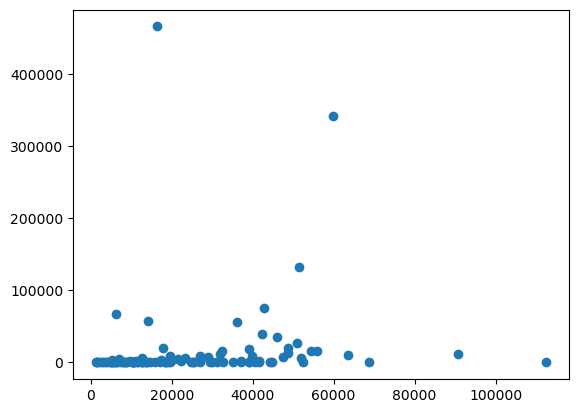

r = 0.14565560071966602
R^2 = 0.02121555402100677


In [22]:
plt.scatter(x=full_wind_df_2020['GDP_Per_Capita'], y=full_wind_df_2020['Total_Wind_GWh'])
plt.show()
r = full_wind_df_2020[['GDP_Per_Capita','Total_Wind_GWh']].corr()['GDP_Per_Capita']['Total_Wind_GWh']
print('r = ' + str(r))
print('R^2 = ' + str(r**2))

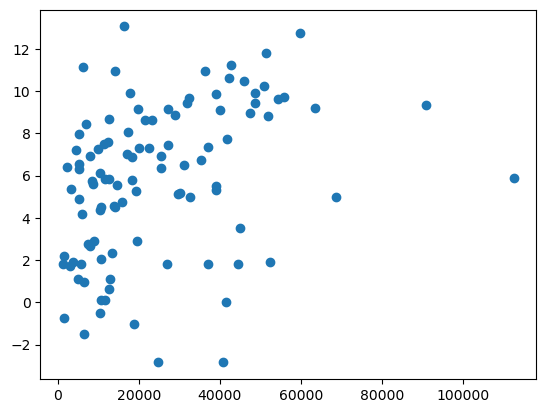

r = 0.34854307633759546
R^2 = 0.1214822760628749


In [23]:
plt.scatter(x=full_wind_df_2020['GDP_Per_Capita'], y=full_wind_df_2020['log_wind'])
plt.show()
r = full_wind_df_2020[['GDP_Per_Capita','log_wind']].corr()['GDP_Per_Capita']['log_wind']
print('r = ' + str(r))
print('R^2 = ' + str(r**2))

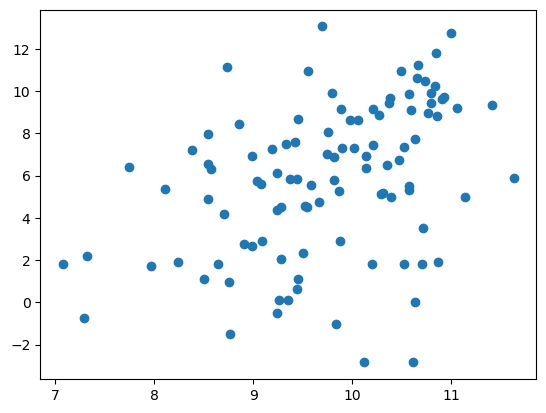

r = 0.3904349081325317
R^2 = 0.15243941748845846


In [24]:
full_wind_df_2020['log_gdp']= np.log(full_wind_df_2020['GDP_Per_Capita'])
plt.scatter(x=full_wind_df_2020['log_gdp'], y=full_wind_df_2020['log_wind'])
plt.show()
r = full_wind_df_2020[['log_gdp','log_wind']].corr()['log_gdp']['log_wind']
print('r = ' + str(r))
print('R^2 = ' + str(r**2))

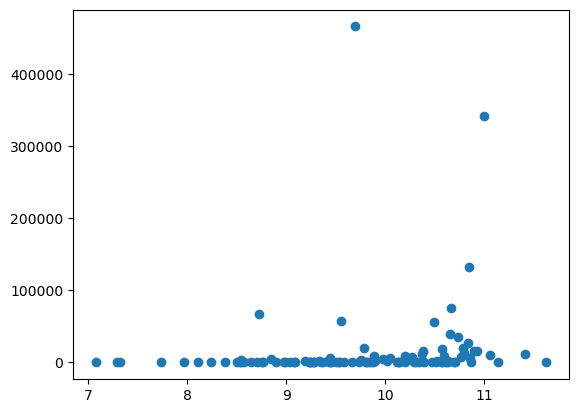

r = 0.15070855103047523
R^2 = 0.022713067353705357


In [25]:
plt.scatter(x=full_wind_df_2020['log_gdp'], y=full_wind_df_2020['Total_Wind_GWh'])
plt.show()
r = full_wind_df_2020[['log_gdp','Total_Wind_GWh']].corr()['log_gdp']['Total_Wind_GWh']
print('r = ' + str(r))
print('R^2 = ' + str(r**2))

There does not appear to be any correlation between GDP per capita and the amount of total electricity from wind production. This is likely due to country size! Macao, Luxembourg, and Singapore - the countries with the highest GDP per capita from the guided portion of this exercise - are all really small countries that don't have much land for wind turbines. I hadn't thought about this when I first chose to explore this dataset. An interesting next step might be to import unmodified GDP data (not per capita) or land mass data to see if there's any correlation between country overall GDP or country land area and wind electricity production.

In [27]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

In [28]:
app = Dash(__name__)

app.layout = html.Div([
    html.H4('Analysis of UN GDP, Life Expectancy, and Wind Electricity Generation'),
    dcc.Dropdown(
        id="dropdown",
        options=['GDP_Per_Capita', 'Total_Wind_GWh', 'Life_Expectancy','log_gdp','log_wind'],
        value=['GDP_Per_Capita', 'Total_Wind_GWh','Life_Expectancy','log_gdp','log_wind'],
        multi=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("dropdown", "value"))
def update_bar_chart(dims):
    fig = px.scatter_matrix(
        full_wind_df_2020, dimensions=dims, color="Continent")
    return fig


app.run_server(debug=True)

C:\Users\alexballi\AppData\Local\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

